# Text Classification with IMDB Movie's description

<center><img src="./img/homepage.png" style="max-height: 400px; max-width: auto;"/></center>

## IMDB Web Scraping

For more information please open 

## Data Preprocessing

### Import Library

In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import csv, re, random

In [33]:
corpus_file = 'movie_corpus.csv'

In [34]:
value_reduced = lambda x: x if None != x and len(str(x)) > 0 else None

In [166]:
dataset = []
with open(corpus_file) as f:
    movie_corpus_reader = csv.DictReader(f, delimiter='|')
    fields = movie_corpus_reader.fieldnames
    
    for movie in movie_corpus_reader:
        if movie['genre'] in ("", None) or 0 == len(movie['genre']):
            continue
            
        movie['year'] = str(movie['year']) if str(movie['year']).isnumeric() and 4 == len(str(movie['year'])) else None
        movie = {k: value_reduced(v) for k,v in movie.items() if 'metascore' != k}
        dataset.append(movie)
        

### Split dataset

In [123]:
# random_seed = int(random.random() * 1e+10)
random_seed = 2958053999

In [181]:
train_dataset, test_dataset = train_test_split(
    dataset,
    random_state=random_seed,
    shuffle=True
)

stratisfy_train = {'genre': [m['genre'] for m in train_dataset]}
stratisfy_test = {'genre': [m['genre'] for m in test_dataset]}

In [182]:
train_dataset[2]

{'title': 'Order Up 2020',
 'year': '2021',
 'movie_rate': None,
 'runtime': None,
 'genre': 'Comedy',
 'rating': None,
 'description': None,
 'directors': 'Gregory Bazile',
 'starts': 'Gregory Bazile+Dendreekius Deal+Myson Deal+Oneshia Edens'}

In [183]:
X_train = pd.DataFrame(train_dataset)
y_train = pd.DataFrame(stratisfy_train)

X_test = pd.DataFrame(test_dataset)
y_test = pd.DataFrame(stratisfy_test)

In [170]:
movie_corpus.head()

,title,year,movie_rate,runtime,genre,rating,description,directors,starts
92827,'Di ko kayang tanggapin,2000,None,102,"Comedy, Romance",6.4,None,Willy Milan,April Boy Regino+Ciara Sotto+Manilyn Reynes+Ma...
65496,'Kurenai no kenjû' yo eien ni,2000,None,97,Drama,None,None,Katsuji Kanazawa+Yoshiko Oikawa,Mayumi Dobashi+Hiroshi Fuse+Manabu Hamada+Yuka...
6886,(I'm Living) A Charmed Life,2000,None,65,Comedy,5.8,"In Maine, Duffy prepares for the arrival of Lu...",Betsy Carson+Kate Kaminski,Tameson Duffy+Buffy Miller+Scott Mullenberg
60897,...und das ist erst der Anfang,2000,None,95,"Comedy, Romance",5.4,The pretty Anna multiplies the romantic advent...,Pierre Franckh,Julia Richter+René Hofschneider+Dieter Landuri...
85006,1 shûkan aiyoku nikki,2000,None,62,Drama,None,None,Masahiro Kobayashi,Hotaru Hazuki+Yôta Kawase


In [171]:
movie_corpus[~movie_corpus.isna()][['genre']]

,genre
92827,"Comedy, Romance"
65496,Drama
6886,Comedy
60897,"Comedy, Romance"
85006,Drama
...,...
47599,"Action, Drama, Thriller"
118541,Horror
90611,Drama
36642,Drama


### Extract movie's genre

In [131]:
def movie_genre_extraction(corpus):

    movie_genre = sorted(list(set([genre.strip() 
                  for genres in corpus[~corpus.genre.isna()]['genre'].tolist()
                  for genre in genres.split(', ')])))
    
    return [k for k in movie_genre if len(k)]

def update_for_genre(genre, corpus):
    for genre in movie_genre:
        corpus[genre] = corpus[~corpus.isna()]['genre'].apply(
            lambda x: 1 if 'str' == type(x).__name__ and genre in x else 0
        )
    
    return corpus

def text_to_float(g):
    
    gross = 0

    if 'float' == type(g).__name__:
        gross = g
        print(gross)
    else:
        gross = float(g.lower().replace('$', '').replace('m', ''))
        
    return gross

def covert_gross(corpus):
    return corpus['gross'][~corpus['gross'].isnull()].apply(text_to_float)

In [132]:
movie_genre = movie_genre_extraction(movie_corpus)
movie_corpus = update_for_genre(movie_genre, movie_corpus)

In [133]:
movie_genre

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [134]:
movie_corpus.head()

,title,year,movie_rate,runtime,genre,rating,description,directors,starts,Action,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
59509,"...Verzeihung, ich lebe",2000,None,81,None,None,None,Andrzej Klamt,None,0,...,0,0,0,0,0,0,0,0,0,0
52634,...und das ist erst der Anfang,2000,None,95,"Comedy, Romance",5.4,The pretty Anna multiplies the romantic advent...,Pierre Franckh,Julia Richter+René Hofschneider+Dieter Landuri...,0,...,0,0,0,1,0,0,0,0,0,0
57198,01412 pasasingeum,2000,None,95,"Action, Fantasy",5.2,A computer game leads the way to a world of fa...,Tae-chan Park,Yoo Ji-Tae+Yeong-jin Lee+Rang Ha+Eun-hye Park,1,...,0,0,0,0,0,0,0,0,0,0
70016,1 shûkan aiyoku nikki,2000,None,62,Drama,None,None,Masahiro Kobayashi,Hotaru Hazuki+Yôta Kawase,0,...,0,0,0,0,0,0,0,0,0,0
11624,100 Girls,2000,R,94,"Comedy, Romance",5.8,Matt spends the night with a girl in an elevat...,Michael Davis,Jonathan Tucker+Emmanuelle Chriqui+James DeBel...,0,...,0,0,0,1,0,0,0,0,0,0


### Store processed data into csv

In [27]:
movie_corpus.to_csv('imdb_movie_corpus.csv', sep='|')

### Shortcut + Refresh

In [ ]:
if 'movie_corpus' not in dir():
    import pandas as pd
    
    movie_corpus = pd.read_csv('imdb_movie_corpus.csv', sep='|')
    movie_genre = movie_genre_extraction(movie_corpus)

### EDA

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
movie_genre_count = movie_corpus[movie_genre].T.sum(axis=1).reset_index()
movie_genre_count.set_index('index', inplace=True)
movie_genre_count['count'] = movie_genre_count[0]
del movie_genre_count[0]

movie_genre_count = movie_genre_count.T
movie_genre_count

index,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
count,13956,1,5881,3331,2439,32471,8959,64046,5395,4587,...,5790,57,243,13377,4030,1768,89,14866,1258,548


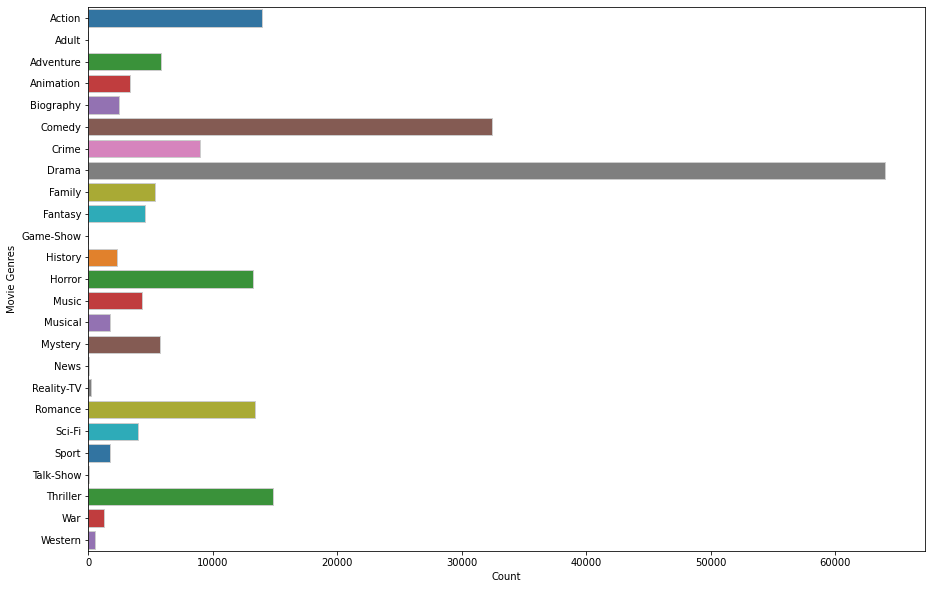

In [137]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(
    palette=sns.color_palette(), 
    edgecolor='.8', 
    data=movie_genre_count,
    orient='h'
)
ax.set(xlabel='Count', ylabel='Movie Genres')


plt.show()

In [138]:
yearly_count = movie_corpus[~movie_corpus.year.isna()][['year']]\
    .groupby('year')\
    .size()\
    .reset_index().rename(columns={
        0: 'values',
    }).set_index(['year']).T

In [139]:
yearly_count

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
values,3072,3194,3260,3235,3386,3888,4070,4399,4953,5643,...,6826,7112,7570,8040,8704,9021,9164,8820,7371,7940


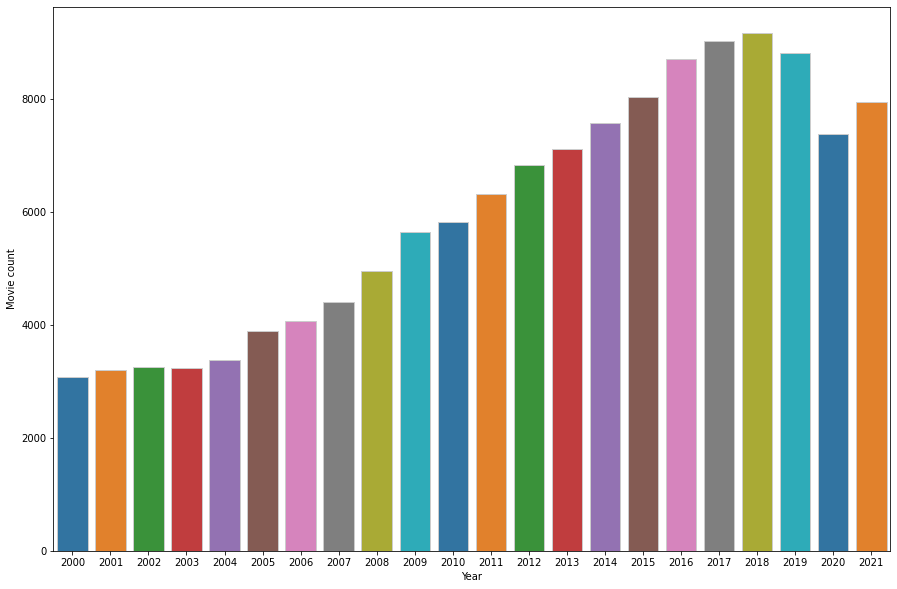

In [140]:
plt.figure(figsize=(15, 10))
# yearly_count.plot.bar()
ax = sns.barplot(
    palette=sns.color_palette(), 
    edgecolor='.8', 
    data=yearly_count,
)

ax.set(xlabel='Year', ylabel='Movie count')
plt.show()

## Text Analytics

In [141]:
import nltk
from nltk.corpus import stopwords

### Download stopwords (Required at first run)

In [ ]:
import ssl

In [ ]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

Dialog below will be shown after cell aboved was executed. All downloaded resource store in `~/nltk_data`

<center><img src="./img/nltk-package.png" /></center>

<center><img src="./img/nltk-package-downloaded.png" /></center>

In [142]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### NLP Example

Objective: We need to tokenized movies description we collected from IMDB with task

- [ ] Remove all special characters such as `,`, `.` or `;` even numbers from description
- [ ] Tokenize movie description
- [ ] Count tokens' frequency
- [ ] Convert to lower characters
- [ ] Remove stop words

### Experiment process

#### Tokenize

In [148]:
from nltk import word_tokenize
from collections import Counter

In [144]:
# sentence = re.sub('[^A-Za-z ]+', '', movie_corpus.description[0].lower())
sentence = movie_corpus.description[0].lower()

In [160]:
# Example
movie_corpus.description[0]
sentence = movie_corpus.description[0].lower()

tokenized = word_tokenize(sentence)
tokenized

['zara',
 '(',
 'gillian',
 'white',
 ')',
 'and',
 'brian',
 '(',
 'michael',
 'jai',
 'white',
 ')',
 'are',
 'living',
 'the',
 'perfect',
 'small',
 'town',
 'life',
 'when',
 'a',
 'mysterious',
 'stranger',
 'from',
 'zara',
 "'s",
 'secret',
 'past',
 'kidnaps',
 'their',
 'daughter',
 'and',
 'now',
 'they',
 'must',
 'race',
 'to',
 'save',
 'her',
 'life',
 '.']

### Remove all stopwords

In [161]:
english_stopwords = frozenset(stopwords.words('english'))

In [164]:
tokenized_set = set(tokenized)

remaining = tokenized_set - english_stopwords
remaining

{"'s",
 '(',
 ')',
 '.',
 'brian',
 'daughter',
 'gillian',
 'jai',
 'kidnaps',
 'life',
 'living',
 'michael',
 'must',
 'mysterious',
 'past',
 'perfect',
 'race',
 'save',
 'secret',
 'small',
 'stranger',
 'town',
 'white',
 'zara'}

In [165]:
tf = Counter(remaining)
tf

Counter({'brian': 1,
         '(': 1,
         'life': 1,
         'michael': 1,
         'living': 1,
         'gillian': 1,
         'secret': 1,
         'white': 1,
         'perfect': 1,
         'kidnaps': 1,
         'save': 1,
         'must': 1,
         'jai': 1,
         'daughter': 1,
         '.': 1,
         'race': 1,
         'stranger': 1,
         'past': 1,
         'small': 1,
         'town': 1,
         'zara': 1,
         "'s": 1,
         'mysterious': 1,
         ')': 1})

In [ ]:
class classification(object):
    def __init__(self, f):
        self.f = f
        
    def __call__(self):
        self.f()

In [ ]:
def text_tokenize(description) -> str:
    import re
    return re.sub('[^A-Za-z ]+', '', description.lower())

def counting(description, stopwords=None):
    if None == stopwords:
        from nltk import stopwords
        stopwords = frozenset(stopwords.words('english'))